In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# 68,335,729 data points in total
import random
p = 0.0001  # 0.01% of the lines -> 6800 data points
# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
"""
df = pd.read_csv(
         'data/all_events.csv',
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)
"""
df = pd.read_csv('../data/AaltoyliopistoMKorkeakouluaukio_sorted.csv')

## Add some useful columns

In [3]:
# sort based on timestamp
df = df.sort_values('ts')
# the hour and minutes of the timestamp
df['hour_and_minutes'] = df['ts'].apply(lambda x: x[11:16])
# month of timestamp
df['month'] = df['ts'].apply(lambda x: x[5:7])
# the percentage of bikes
df['bikes_percent'] = df['bikes'] / df['total_slots']
df['minutes_from_midnight'] = df['ts'].apply(lambda x: int(x[11:13]) * 60 + int(x[14:16]))
df.head()

,ts,lat,lon,operative,sid,name,bikes,total_slots,hour_and_minutes,month,bikes_percent,minutes_from_midnight
0,2018-05-11T07:48:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",5,40,07:48,05,0.125,468
1,2018-05-11T07:49:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:49,05,0.100,469
2,2018-05-11T07:50:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:50,05,0.100,470
3,2018-05-11T07:51:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:51,05,0.100,471
4,2018-05-11T07:52:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:52,05,0.100,472


## Explore 

In [4]:
df.describe()

,lat,lon,operative,sid,bikes,total_slots,bikes_percent,minutes_from_midnight
count,1.429370e+05,1.429370e+05,142937.0,142937.0,142937.000000,142937.000000,142937.000000,142937.000000
mean,6.018431e+01,2.482667e+01,1.0,541.0,7.527197,40.641513,0.185329,730.393320
std,2.679466e-11,7.051096e-11,0.0,0.0,9.217886,0.479558,0.227243,405.433105
min,6.018431e+01,2.482667e+01,1.0,541.0,0.000000,40.000000,0.000000,0.000000
25%,6.018431e+01,2.482667e+01,1.0,541.0,1.000000,40.000000,0.024390,386.000000
50%,6.018431e+01,2.482667e+01,1.0,541.0,4.000000,41.000000,0.097561,731.000000
75%,6.018431e+01,2.482667e+01,1.0,541.0,11.000000,41.000000,0.275000,1080.000000
max,6.018431e+01,2.482667e+01,1.0,541.0,60.000000,41.000000,1.463415,1439.000000


In [5]:
df.head(10)

,ts,lat,lon,operative,sid,name,bikes,total_slots,hour_and_minutes,month,bikes_percent,minutes_from_midnight
0,2018-05-11T07:48:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",5,40,07:48,05,0.125,468
1,2018-05-11T07:49:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:49,05,0.100,469
2,2018-05-11T07:50:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:50,05,0.100,470
3,2018-05-11T07:51:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:51,05,0.100,471
4,2018-05-11T07:52:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:52,05,0.100,472
5,2018-05-11T07:53:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:53,05,0.100,473
6,2018-05-11T07:54:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:54,05,0.100,474
7,2018-05-11T07:55:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:55,05,0.100,475
8,2018-05-11T07:56:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:56,05,0.100,476
9,2018-05-11T07:57:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:57,05,0.100,477


In [6]:
by_hour = df.groupby('hour_and_minutes').mean()[0::60]
by_hour

,lat,lon,operative,sid,bikes,total_slots,bikes_percent,minutes_from_midnight
hour_and_minutes,,,,,,,,
00:00,60.184312,24.826671,1.0,541.0,2.428571,40.702381,0.059785,0.0
01:00,60.184312,24.826671,1.0,541.0,2.123457,40.641975,0.052401,60.0
02:00,60.184312,24.826671,1.0,541.0,2.455696,40.620253,0.060567,120.0
03:00,60.184312,24.826671,1.0,541.0,2.536082,40.649485,0.062434,180.0
04:00,60.184312,24.826671,1.0,541.0,5.039604,40.633663,0.123901,240.0
05:00,60.184312,24.826671,1.0,541.0,9.959596,40.636364,0.245140,300.0
06:00,60.184312,24.826671,1.0,541.0,12.087379,40.640777,0.297685,360.0
07:00,60.184312,24.826671,1.0,541.0,12.524272,40.640777,0.308371,420.0
08:00,60.184312,24.826671,1.0,541.0,12.278846,40.634615,0.302257,480.0


[Text(0,0,'00:00'),
 Text(0,0,'01:00'),
 Text(0,0,'02:00'),
 Text(0,0,'03:00'),
 Text(0,0,'04:00'),
 Text(0,0,'05:00'),
 Text(0,0,'06:00'),
 Text(0,0,'07:00'),
 Text(0,0,'08:00'),
 Text(0,0,'09:00'),
 Text(0,0,'10:00'),
 Text(0,0,'11:00'),
 Text(0,0,'12:00'),
 Text(0,0,'13:00'),
 Text(0,0,'14:00'),
 Text(0,0,'15:00'),
 Text(0,0,'16:00'),
 Text(0,0,'17:00'),
 Text(0,0,'18:00'),
 Text(0,0,'19:00'),
 Text(0,0,'20:00'),
 Text(0,0,'21:00'),
 Text(0,0,'22:00'),
 Text(0,0,'23:00')]

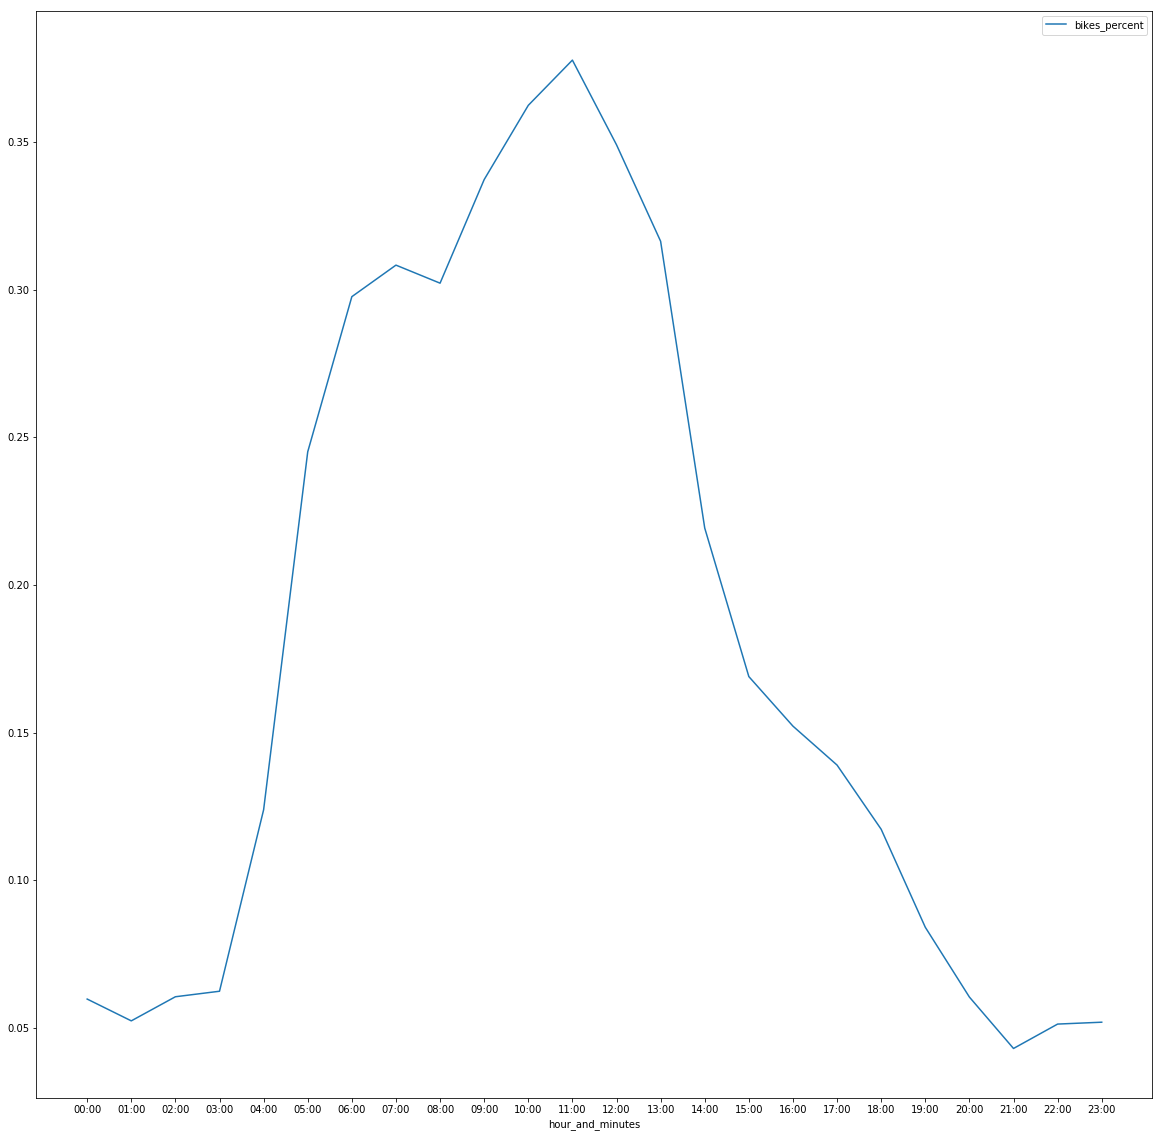

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
by_hour.plot(y='bikes_percent', ax=ax)
ax.set_xticks(range(len(by_hour.index)))
ax.set_xticklabels(by_hour.index)

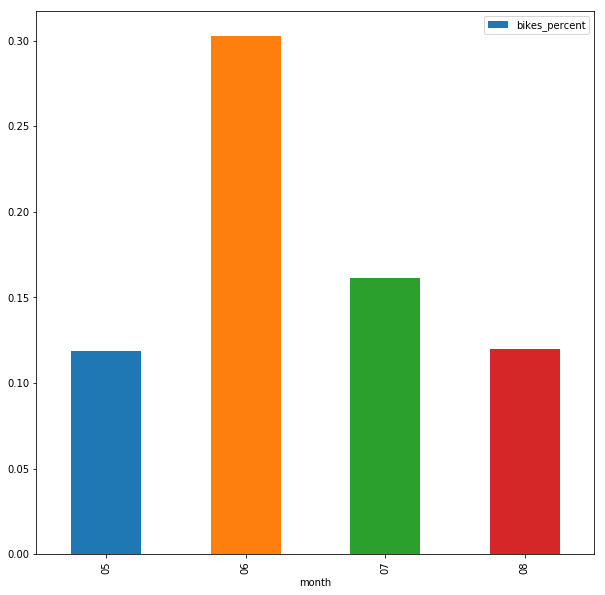

In [8]:
by_month = df.groupby('month').mean()
by_month.plot(y='bikes_percent', kind='bar', figsize=(10, 10))

In [9]:
# this is useful when using data from several stations
by_name = df.groupby('name').mean()
by_name

,lat,lon,operative,sid,bikes,total_slots,bikes_percent,minutes_from_midnight
name,,,,,,,,
"Aalto-yliopisto (M), Korkeakouluaukio",60.184312,24.826671,1.0,541.0,7.527197,40.641513,0.185329,730.39332


## Prepare for predictions

### Add information about how long it took for a new bike to arrive

#### Add the same minutes to all slots before the new bike

In [10]:
df.head(50)

,ts,lat,lon,operative,sid,name,bikes,total_slots,hour_and_minutes,month,bikes_percent,minutes_from_midnight
0,2018-05-11T07:48:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",5,40,07:48,05,0.125,468
1,2018-05-11T07:49:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:49,05,0.100,469
2,2018-05-11T07:50:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:50,05,0.100,470
3,2018-05-11T07:51:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:51,05,0.100,471
4,2018-05-11T07:52:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:52,05,0.100,472
5,2018-05-11T07:53:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:53,05,0.100,473
6,2018-05-11T07:54:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:54,05,0.100,474
7,2018-05-11T07:55:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:55,05,0.100,475
8,2018-05-11T07:56:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:56,05,0.100,476
9,2018-05-11T07:57:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:57,05,0.100,477


In [11]:
# add column which states whether a bike was added at a given moment
df['bike_added'] = df.apply(lambda x: df.iloc[(x.name - 1 if x.name > 0 else 0)]['bikes'] < x['bikes'] , axis=1)
# df['bike_removed'] = df.apply(lambda x: df.iloc[(x.name - 1 if x.name > 0 else 0)]['bikes'] > x['bikes'] , axis=1)
df.head(50)

,ts,lat,lon,operative,sid,name,bikes,total_slots,hour_and_minutes,month,bikes_percent,minutes_from_midnight,bike_added
0,2018-05-11T07:48:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",5,40,07:48,05,0.125,468,False
1,2018-05-11T07:49:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:49,05,0.100,469,False
2,2018-05-11T07:50:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:50,05,0.100,470,False
3,2018-05-11T07:51:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:51,05,0.100,471,False
4,2018-05-11T07:52:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:52,05,0.100,472,False
5,2018-05-11T07:53:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:53,05,0.100,473,False
6,2018-05-11T07:54:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:54,05,0.100,474,False
7,2018-05-11T07:55:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:55,05,0.100,475,False
8,2018-05-11T07:56:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:56,05,0.100,476,False
9,2018-05-11T07:57:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:57,05,0.100,477,False


In [12]:
# extract difference in minutes to a separate column
i = 0
first_non_additive_index = 0
while (i < len(df)):
    while (i < len(df) and df.iloc[i]['bike_added'] == False):
        i += 1
    if (i >= len(df)):
        break
    additive_row = df.iloc[i]
    time = additive_row['minutes_from_midnight']
    difference = abs(time - df.iloc[first_non_additive_index]['minutes_from_midnight'])
    df.loc[first_non_additive_index:i-1, 'bike_added_time_slot'] = difference 
    df.loc[i, 'bike_added_time_slot'] = 0
    i += 1
    first_non_additive_index = i
# if we cant know when the next bike will be added, fill with -1 for now
df = df.fillna(-1)
df.head(50)

,ts,lat,lon,operative,sid,name,bikes,total_slots,hour_and_minutes,month,bikes_percent,minutes_from_midnight,bike_added,bike_added_time_slot
0,2018-05-11T07:48:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",5,40,07:48,05,0.125,468,False,16.0
1,2018-05-11T07:49:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:49,05,0.100,469,False,16.0
2,2018-05-11T07:50:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:50,05,0.100,470,False,16.0
3,2018-05-11T07:51:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:51,05,0.100,471,False,16.0
4,2018-05-11T07:52:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:52,05,0.100,472,False,16.0
5,2018-05-11T07:53:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:53,05,0.100,473,False,16.0
6,2018-05-11T07:54:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:54,05,0.100,474,False,16.0
7,2018-05-11T07:55:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:55,05,0.100,475,False,16.0
8,2018-05-11T07:56:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:56,05,0.100,476,False,16.0
9,2018-05-11T07:57:01,60.184312,24.826671,1,541,"Aalto-yliopisto (M), Korkeakouluaukio",4,40,07:57,05,0.100,477,False,16.0


## Build a linear regression model

In [13]:
# removes useless columns and the column to predict
x = df.drop(columns=['ts', 'sid', 'bike_added_time_slot', 'hour_and_minutes', 'name', 'bike_added'])
print('predicting based on ', x.columns.values)
y = df['bike_added_time_slot']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

predicting based on  ['lat' 'lon' 'operative' 'bikes' 'total_slots' 'month' 'bikes_percent'
 'minutes_from_midnight']


0.08755345706914375